In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pathlib import Path

path_to_assigment_dir = Path("/content/drive/MyDrive/BME/ML FOR FUNCTIONAL GENOMICS/ML4FG Project/data")
df = pd.read_csv(path_to_assigment_dir / "CCLE_expression.csv", index_col=0)

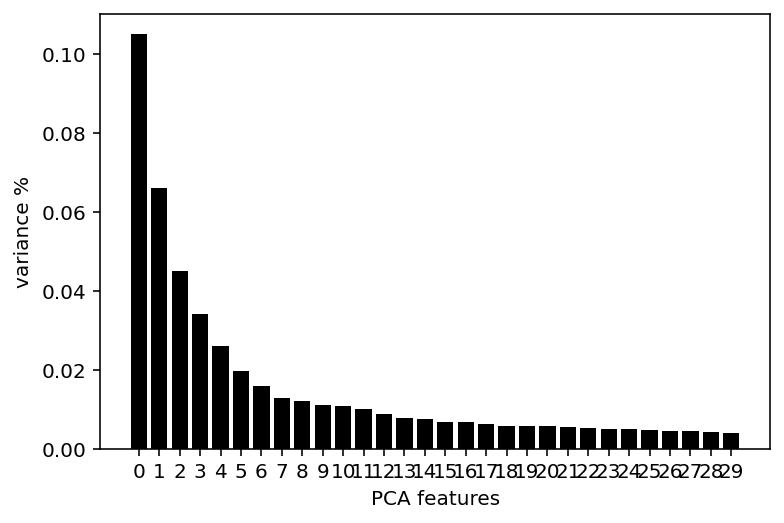

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

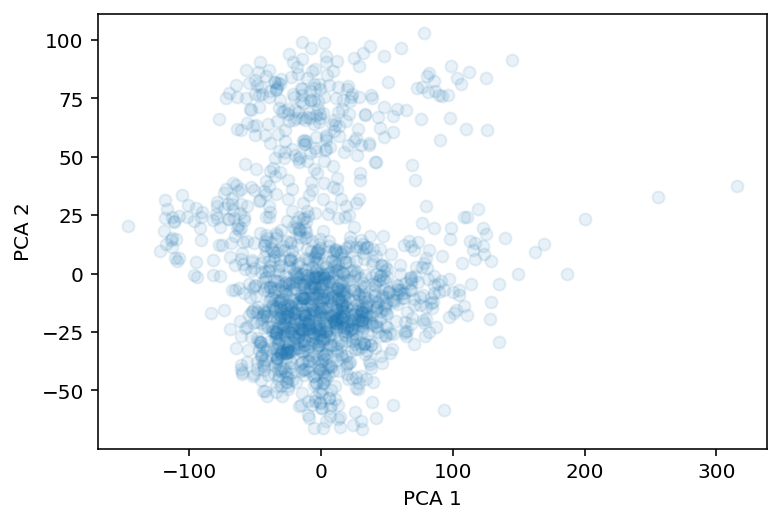

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

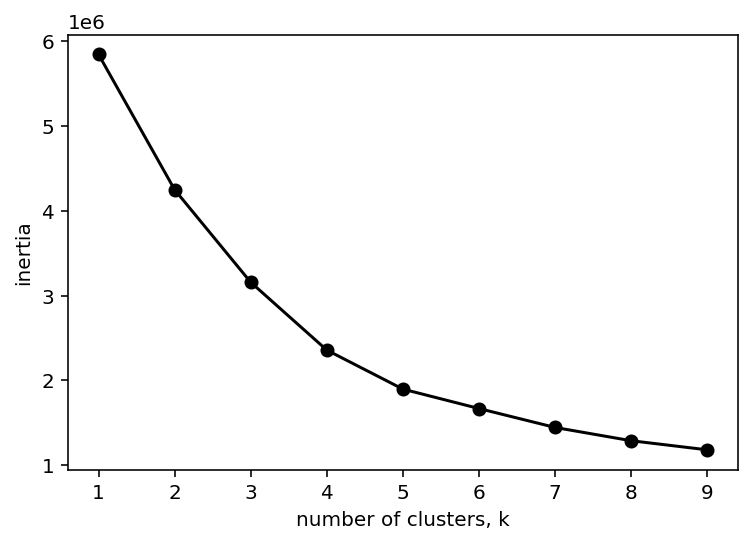

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'PCA 2')

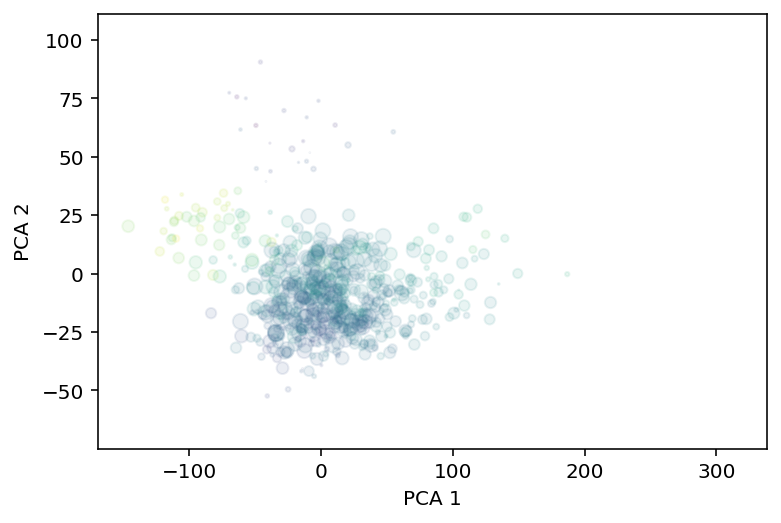

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], PCA_components[2], PCA_components[3], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
principalComponents.shape

(1406, 30)

In [ ]:
df_pca = pd.DataFrame(data = principalComponents, 
                        index = df.index, 
                        columns = [f"PCA {i+1}" for i in range(30)])
df_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,...,PCA 21,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30
ACH-001113,-25.745108,-15.568556,2.120064,13.878327,-22.520860,32.095196,-6.906017,-8.652259,27.836795,4.260004,...,5.436345,-6.649936,4.832460,3.122206,-2.678483,-1.625984,13.503814,-13.271261,-17.809344,-12.155445
ACH-001289,-38.957690,-5.681544,-38.927319,42.554015,-31.882135,19.574522,7.009899,2.920208,-8.300525,25.180667,...,-2.309661,-0.082951,8.492279,0.251295,0.886706,15.835386,-8.839930,5.839044,5.332922,-1.399471
ACH-001339,17.555792,-25.197873,-49.656538,0.740928,-37.413584,8.377227,39.806286,-28.661768,33.021125,-7.284423,...,-7.527109,1.900588,-2.704800,0.739996,-5.210752,2.834409,2.556846,3.154110,-0.622448,2.143051
ACH-001538,34.849237,-16.720328,15.079702,-2.683641,-38.896408,43.803817,-7.555120,-1.722668,12.793943,-2.993395,...,3.866204,-4.687766,4.252298,-0.748464,-2.915744,-5.318114,-0.279290,8.197297,6.050526,-10.701730
ACH-000242,-0.809104,-1.301541,40.733726,-5.028571,-14.791089,-0.851318,-2.956933,2.760981,5.730041,1.438839,...,-7.974005,5.804552,4.344360,5.990962,10.716691,5.582502,-12.304234,15.492186,1.020398,-13.464004


In [ ]:
df_pca = df_pca.sort_index()

### Add info

In [ ]:
df_info = pd.read_csv(path_to_assigment_dir / 'sample_info.csv')
cell_lines_info = df_info[['DepMap_ID', 'sample_collection_site', 'lineage', 'primary_disease']]
cell_lines_info = cell_lines_info.set_index("DepMap_ID").sort_index()
cell_lines_info.head()

,sample_collection_site,lineage,primary_disease
DepMap_ID,,,
ACH-000001,ascites,ovary,Ovarian Cancer
ACH-000002,haematopoietic_and_lymphoid_tissue,blood,Leukemia
ACH-000003,Colon,colorectal,Colon/Colorectal Cancer
ACH-000004,haematopoietic_and_lymphoid_tissue,blood,Leukemia
ACH-000005,bone_marrow,blood,Leukemia


In [ ]:
cell_lines_info.groupby('lineage').count()

,DepMap_ID,sample_collection_site,primary_disease
lineage,,,
adrenal_cortex,1,1,1
bile_duct,43,43,43
blood,141,141,141
bone,79,79,79
breast,86,86,86
central_nervous_system,109,107,109
cervix,24,24,24
colorectal,85,85,85
embryo,4,4,4


In [ ]:
cell_lines_info.groupby('primary_disease')['lineage'].apply(lambda x: len(set(x)))

primary_disease
Adrenal Cancer                 1
Bile Duct Cancer               1
Bladder Cancer                 1
Bone Cancer                    1
Brain Cancer                   2
Breast Cancer                  1
Cervical Cancer                1
Colon/Colorectal Cancer        1
Embryonal Cancer               1
Endometrial/Uterine Cancer     1
Esophageal Cancer              1
Eye Cancer                     1
Gallbladder Cancer             1
Gastric Cancer                 1
Head and Neck Cancer           1
Kidney Cancer                  1
Leukemia                       1
Liposarcoma                    1
Liver Cancer                   1
Lung Cancer                    1
Lymphoma                       1
Myeloma                        1
Neuroblastoma                  1
Non-Cancerous                 10
Ovarian Cancer                 1
Pancreatic Cancer              1
Prostate Cancer                1
Rhabdoid                       2
Sarcoma                        3
Skin Cancer                

### Plot things

In [ ]:
cell_lines_info.columns

Index(['DepMap_ID', 'sample_collection_site', 'lineage', 'primary_disease'], dtype='object')

In [ ]:
cell_lines_info.groupby('lineage').count().sort_values('primary_disease')

,sample_collection_site,primary_disease
lineage,,
adrenal_cortex,1,1
epidermoid_carcinoma,1,1
embryo,4,4
prostate,14,14
eye,17,17
thyroid,21,21
cervix,24,24
liver,27,27
plasma_cell,35,35


In [ ]:
cols = ['sample_collection_site', 'lineage', 'primary_disease']

In [ ]:
df_pca[cols] = cell_lines_info[cols][cell_lines_info.index.isin(df_pca.index)]

In [ ]:
sorted_lineages = cell_lines_info.groupby('lineage').count().sort_values('primary_disease').index[::-1]

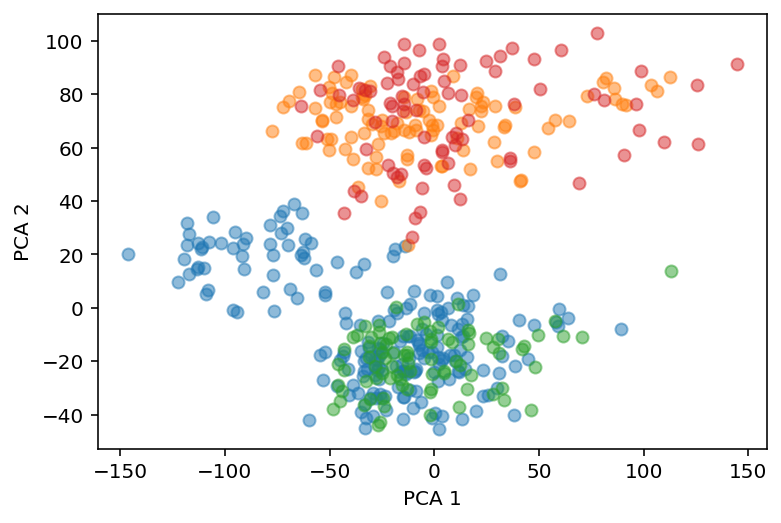

In [ ]:
lineages_to_plot = sorted_lineages[:4]
for lineage in lineages_to_plot:
    plt.scatter(df_pca[df_pca['lineage'] == lineage]['PCA 1'], 
                df_pca[df_pca['lineage'] == lineage]['PCA 2'], alpha=.5,
                label=lineage)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

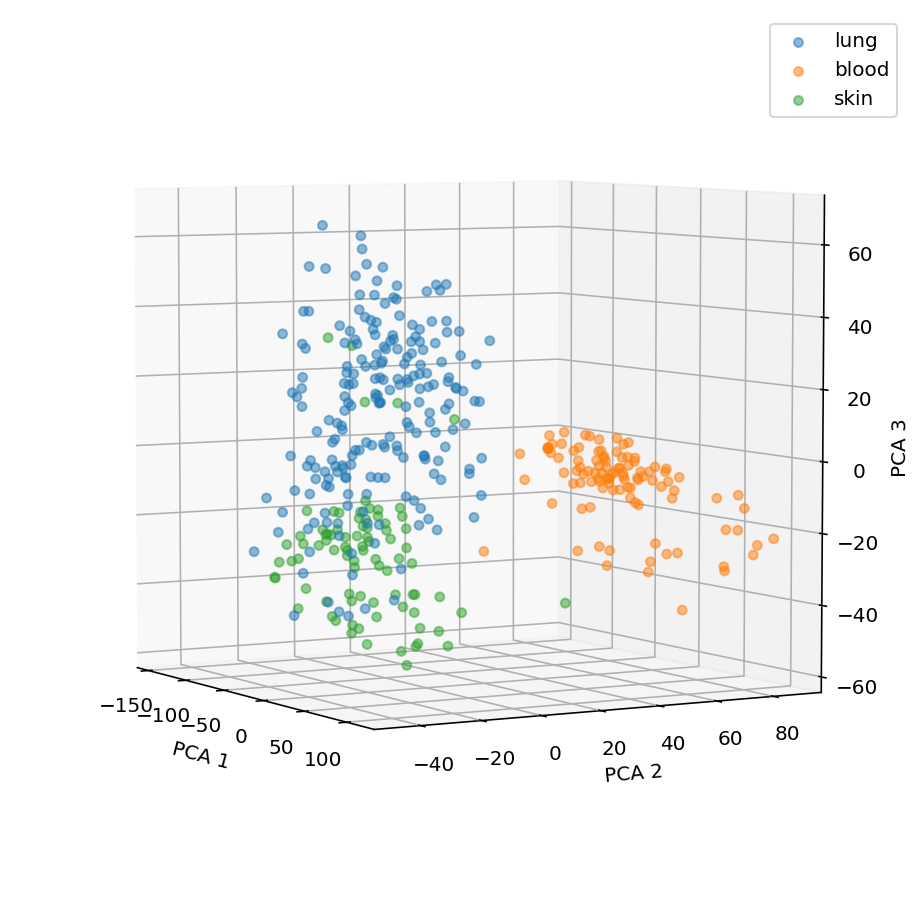

In [104]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
lineages_to_plot = sorted_lineages[:3]
for lineage in lineages_to_plot:
    ax.scatter3D(df_pca[df_pca['lineage'] == lineage]['PCA 1'], 
                 df_pca[df_pca['lineage'] == lineage]['PCA 2'],
                 df_pca[df_pca['lineage'] == lineage]['PCA 3'],
                 alpha=.5,
                label=lineage)
ax.view_init(elev=5., azim=-30)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.show()

In [93]:
sorted_primary_diseases = cell_lines_info.groupby('primary_disease').count().sort_values('lineage').index[::-1]

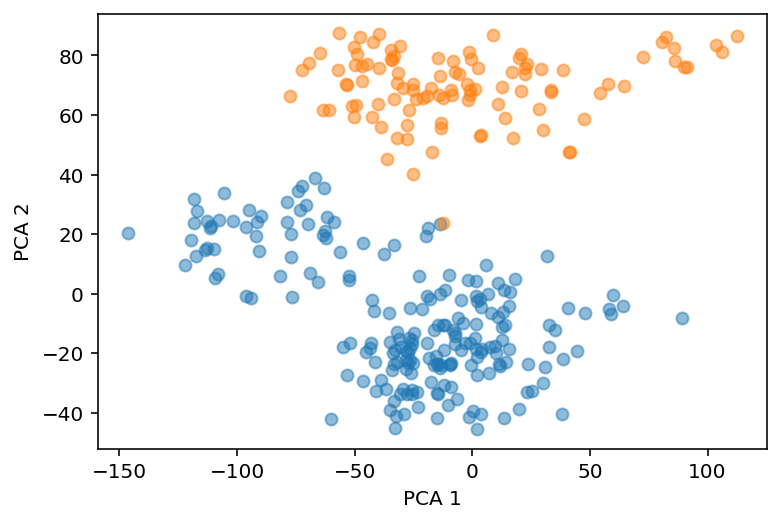

In [99]:
primary_diseases_to_plot = sorted_primary_diseases[:2]
for primary_disease in primary_diseases_to_plot:
    plt.scatter(df_pca[df_pca['primary_disease'] == primary_disease]['PCA 1'], 
                df_pca[df_pca['primary_disease'] == primary_disease]['PCA 2'], alpha=.5,
                label=primary_disease)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

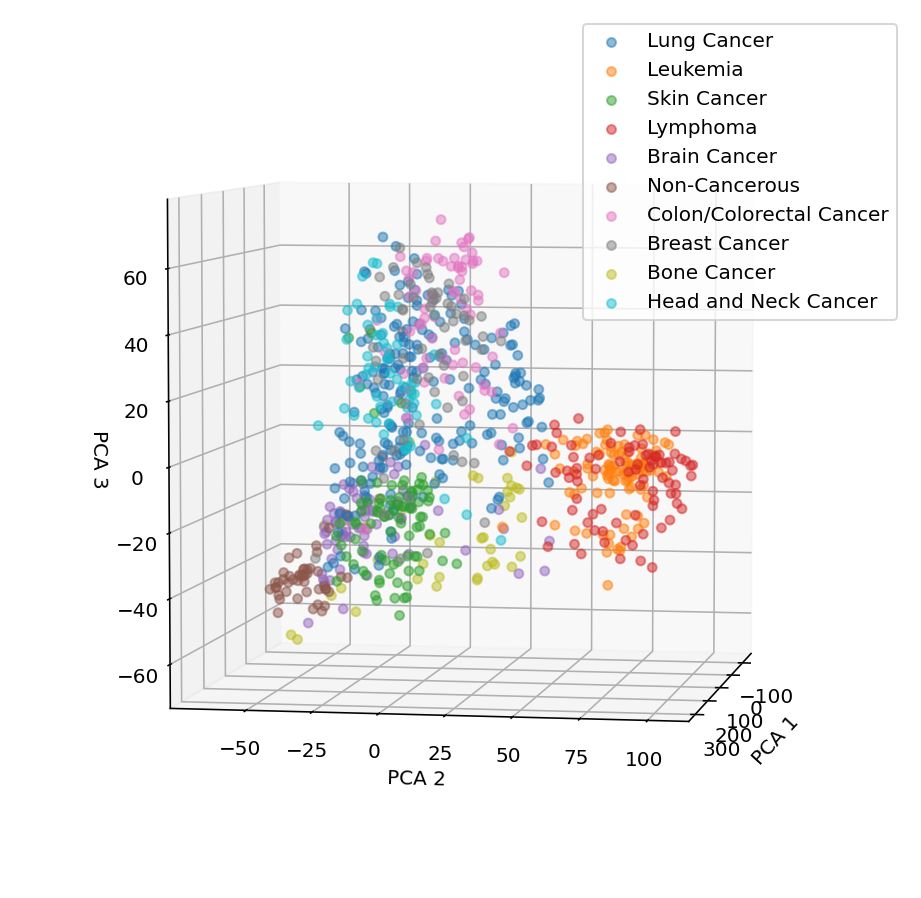

In [110]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
idx = [1,2,5,6]
primary_diseases_to_plot = sorted_primary_diseases[:10] #[idx]
for primary_disease in primary_diseases_to_plot:
    ax.scatter3D(df_pca[df_pca['primary_disease'] == primary_disease]['PCA 1'], 
                 df_pca[df_pca['primary_disease'] == primary_disease]['PCA 2'],
                 df_pca[df_pca['primary_disease'] == primary_disease]['PCA 3'],
                 alpha=.5,
                label=primary_disease)
ax.view_init(elev=5., azim=10)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.show()